In [31]:
#importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#importig csv file

df= pd.read_csv(r'C:\Users\admin\Downloads\Diwali Sales Data.csv', encoding='unicode_escape')

In [33]:
df.shape

(11251, 15)

In [34]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [36]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [37]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [38]:
#drop null values
df.dropna(inplace=True)

In [39]:
#change data type
df['Amount']=df['Amount'].astype('int')

In [40]:
df['Amount'].dtypes

dtype('int64')

In [41]:
df['Marital_Status']=df['Marital_Status'].astype('object')

In [42]:
df['Marital_Status'].dtypes

dtype('O')

In [43]:
#replacing column values
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Married', 1:'Unmarried'})

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  object
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


In [45]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [46]:
#describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [47]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### EXPLORATORY DATA ANALYSIS (EDA)

### Gender

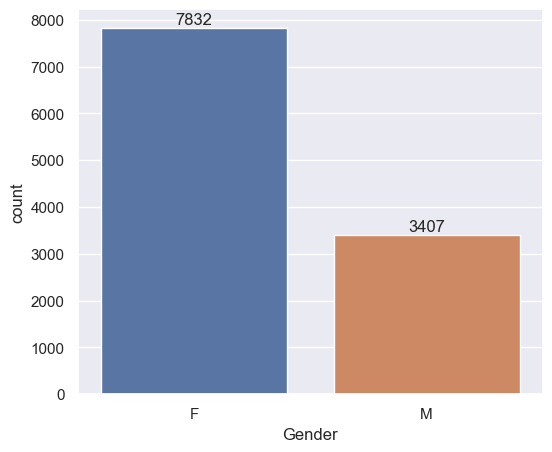

In [129]:
# plotting a bar chart for Gender and it's count

ax=sns.countplot(x='Gender',data=df, hue='Gender')
sns.set(rc={'figure.figsize':(6,5)})

for bars in ax.containers:
   ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

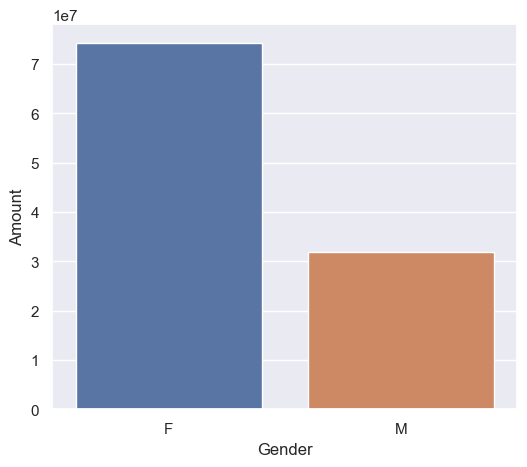

In [131]:
# plotting a bar chart for gender vs total amount

sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Gender', y= 'Amount', data=sales_gen, hue='Gender')

*From the above graph we can see that most of the buyers are females and the purchasing power of females is greater than men*

### Age

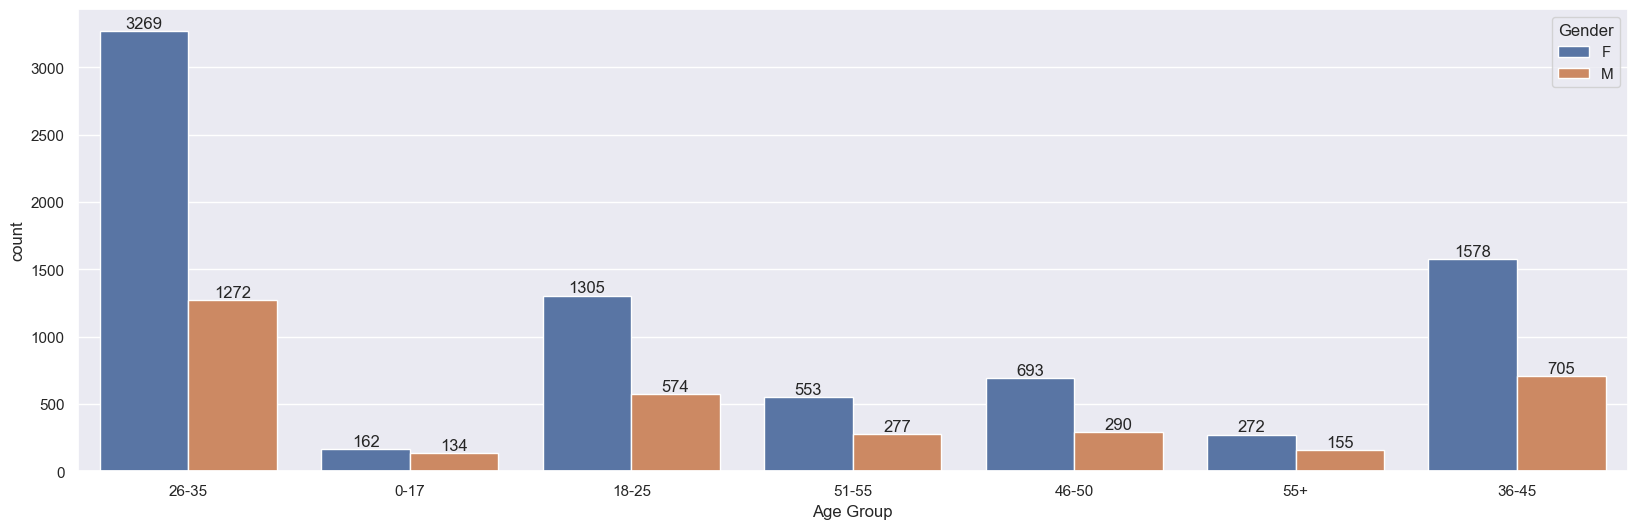

In [50]:
ax=sns.countplot(data=df, x='Age Group', hue ='Gender')

sns.set(rc={'figure.figsize':(9,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

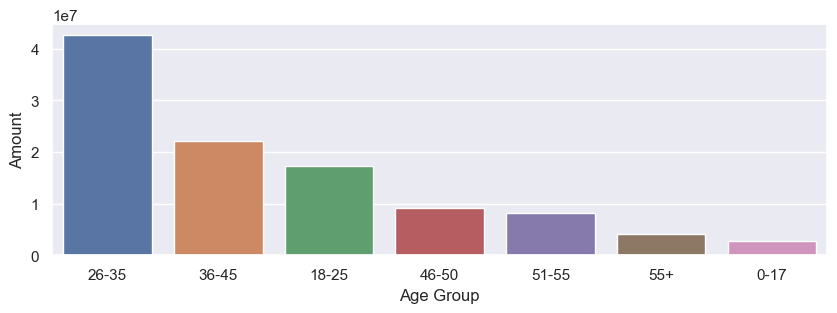

In [51]:
# Total Amount vs Age Group

sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(x= 'Age Group', y='Amount', data=sales_age, hue='Age Group')

*From the above graphs we can see that most of the buyers are females between the age group of 26-35 years*

### State

<Axes: xlabel='State', ylabel='Orders'>

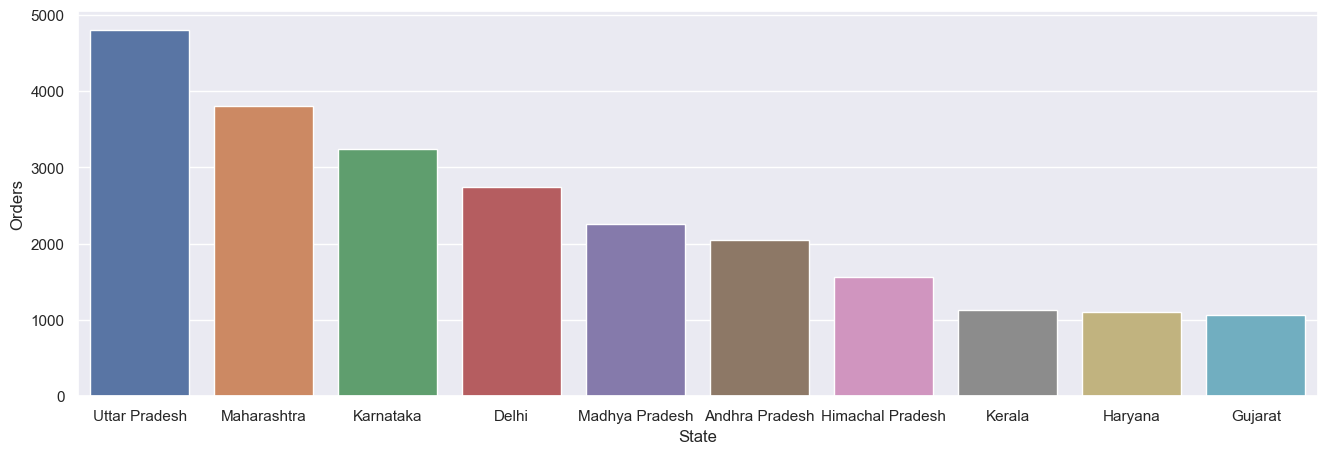

In [52]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State', y='Orders', hue='State',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

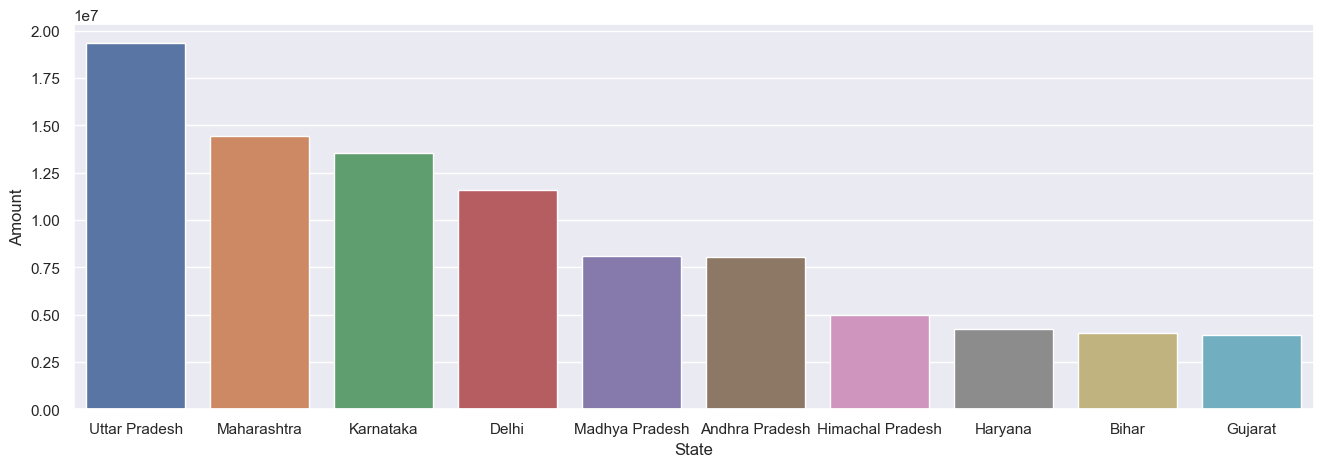

In [53]:
# total amount/sales from top 10 states

sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State', y='Amount', data=sales_state, hue='State')

*From the above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively* 

### Marital Status

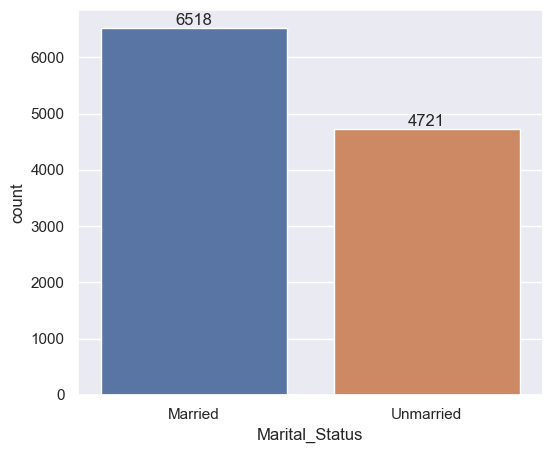

In [91]:
ax = sns.countplot(data = df, x ='Marital_Status',hue='Marital_Status')

sns.set(rc={'figure.figsize':(4,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

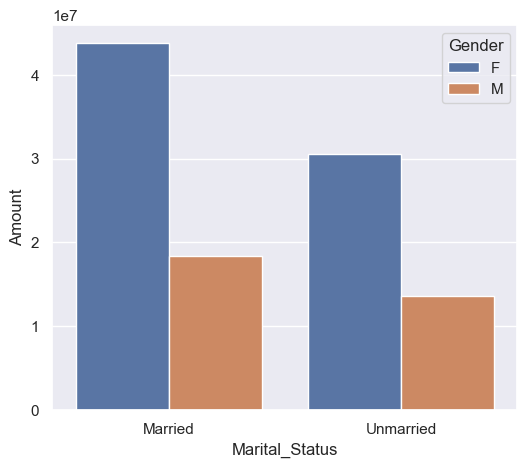

In [55]:
sales=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status', y='Amount', data= sales, hue ='Gender')

*From the above graphs we can see that most of the buyers are are married (women) and they have high purchasing power*

### Occupation

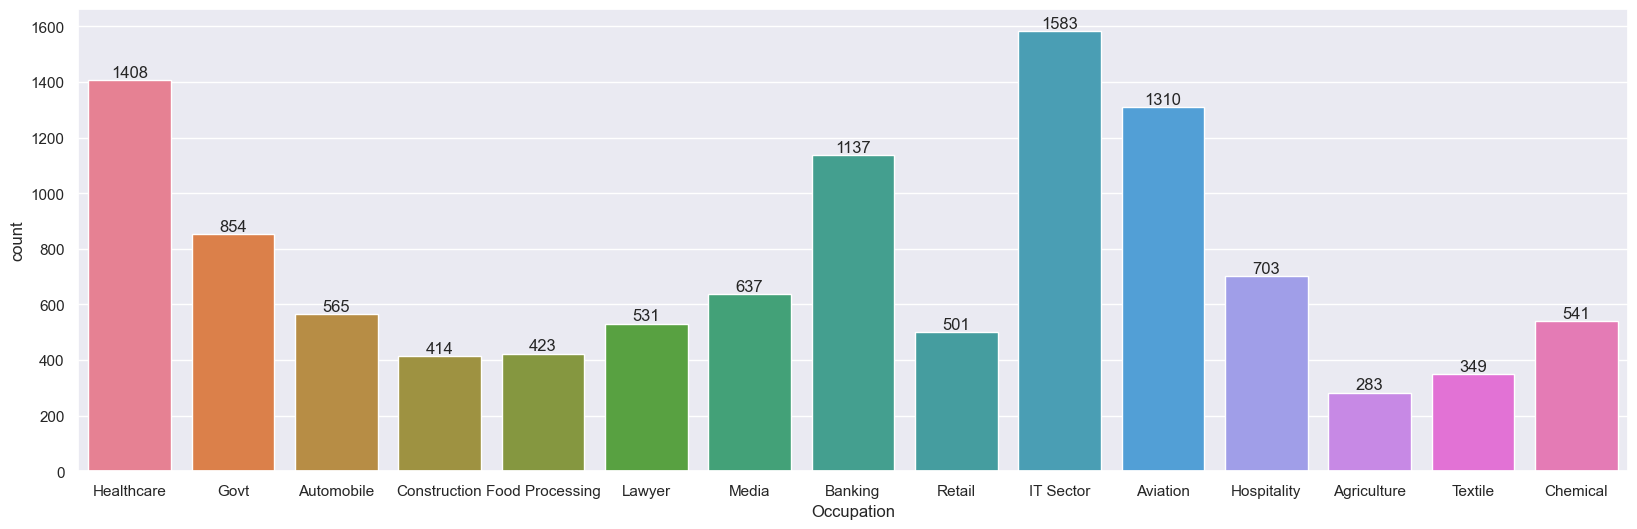

In [93]:
ax=sns.countplot(data=df, x='Occupation', hue='Occupation')

sns.set(rc={'figure.figsize':(20,6)})
for bars in ax.containers:
    ax.bar_label(bars)

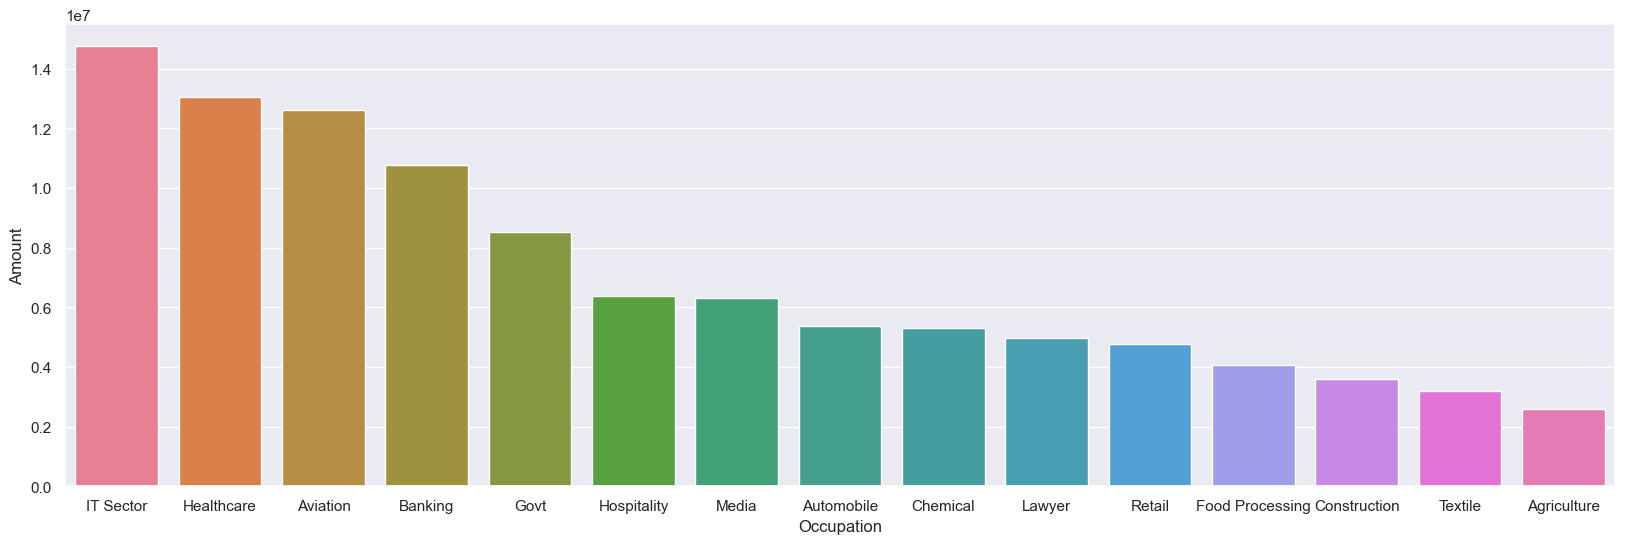

In [57]:
sales_by_occupation=df.groupby(['Occupation'],as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Occupation', y='Amount', data=sales_by_occupation, hue='Occupation')
sns.set(rc={'figure.figsize':(20,6)})

*Fromm the above graphs we can see that most of the buyers are working in the IT, Healthcare and Aviation sectors.* 

### Product Category

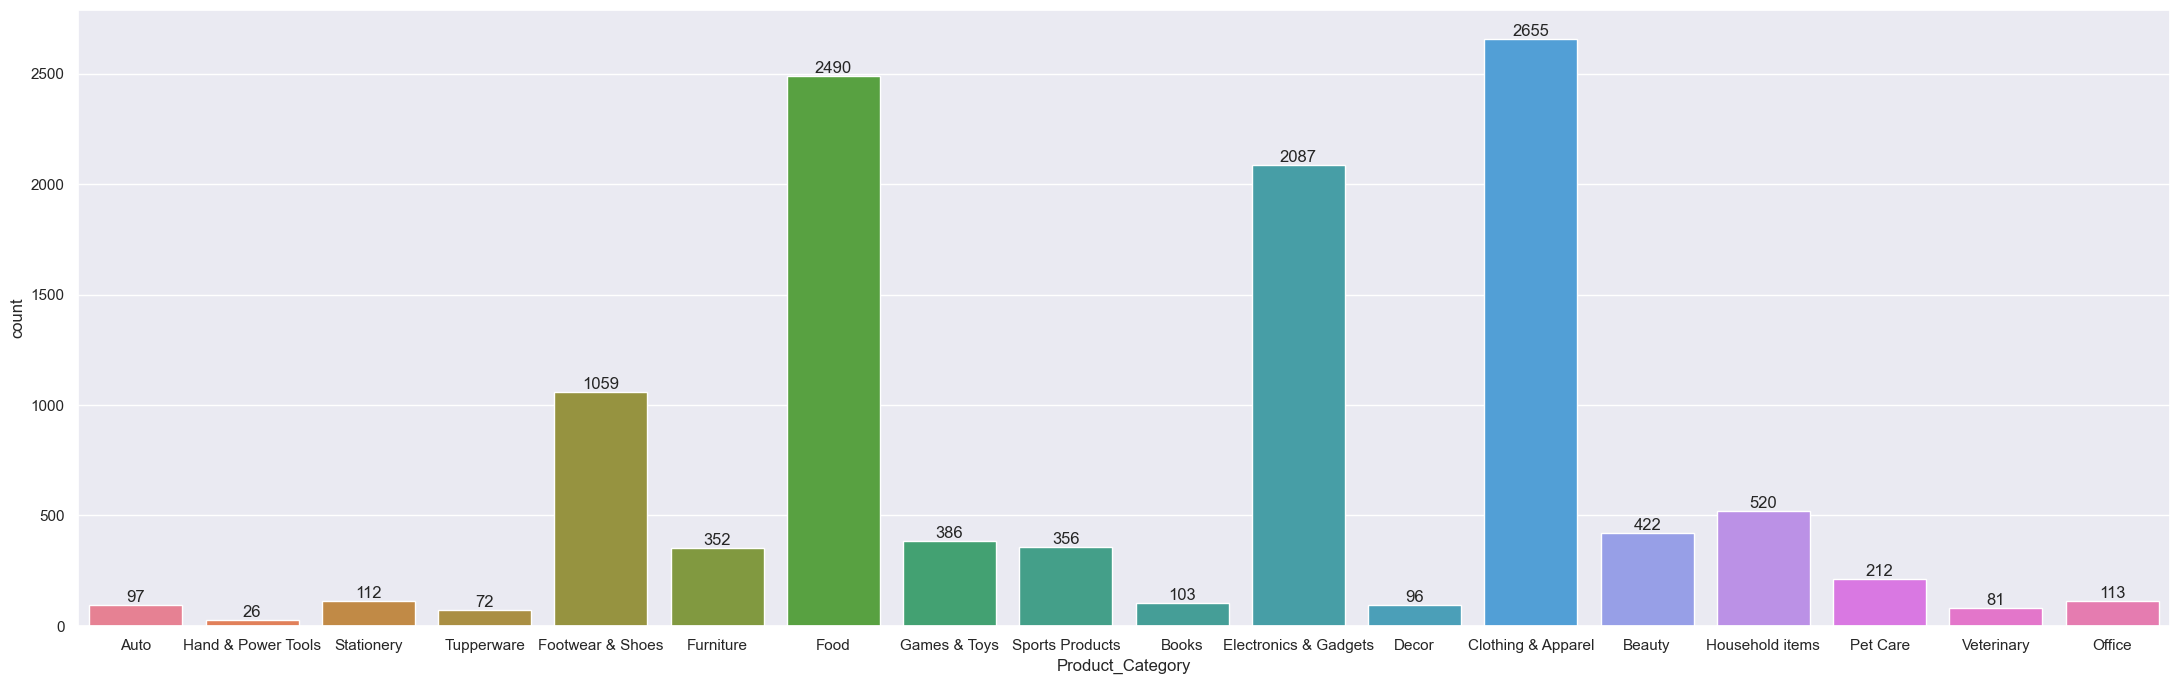

In [114]:
ax=sns.countplot(x='Product_Category', data=df, hue='Product_Category')
    
for bars in ax.containers:
 ax.bar_label(bars)
sns.set(rc={'figure.figsize':(27,9)})

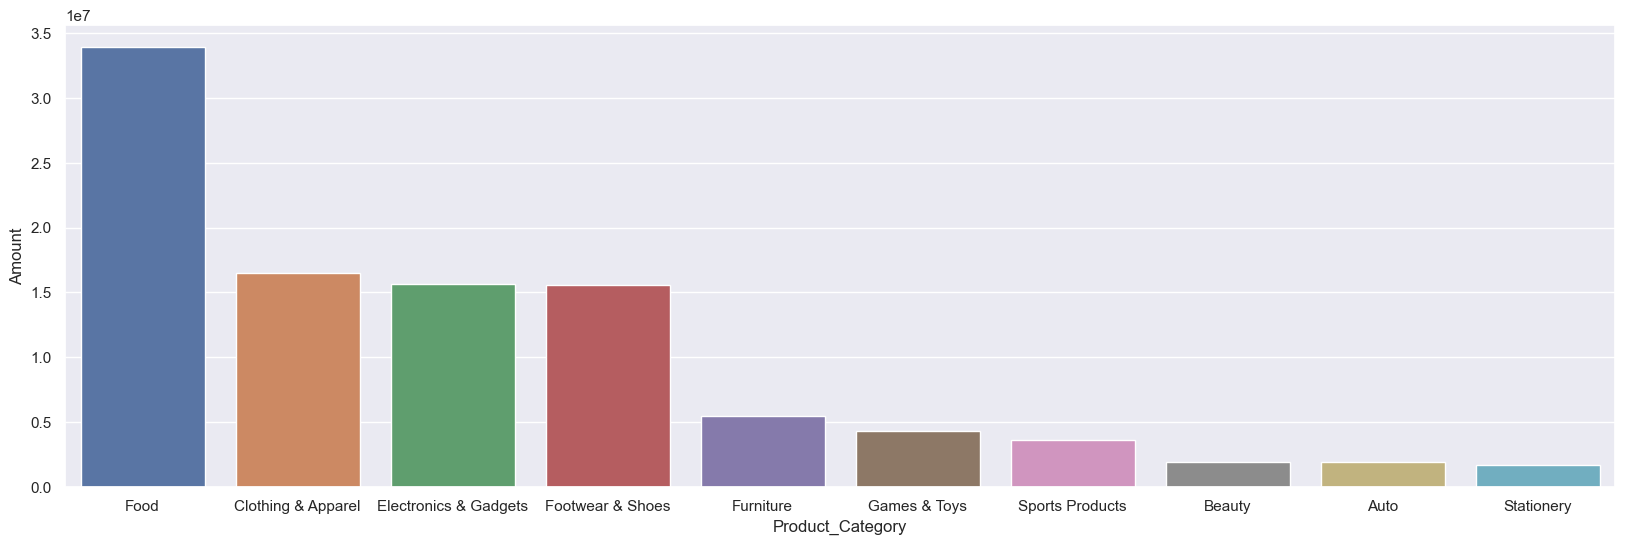

In [104]:
sales_by_category=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.barplot(x='Product_Category', y='Amount', data=sales_by_category,  hue='Product_Category')
sns.set(rc={'figure.figsize':(20,6)})

*From the graphs above, we can see that most of the sold products belong to the Food, Clothing, and Electronics categories.*

In [105]:
#Top 10 most sold Products

<Axes: xlabel='Product_ID'>

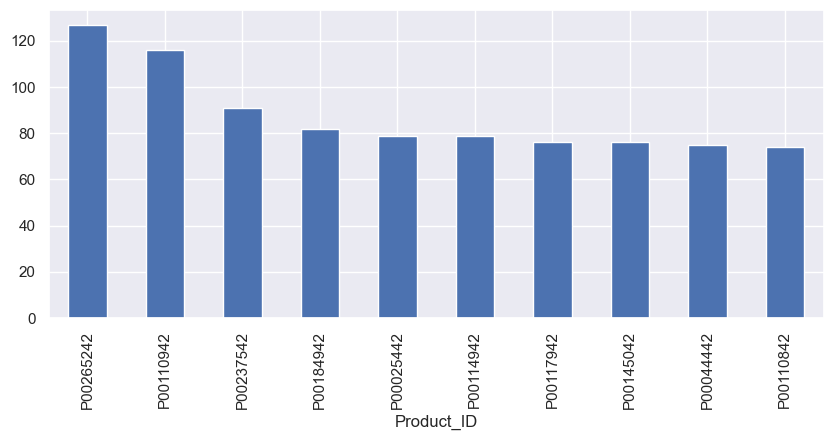

In [120]:
fig1, ax1=plt.subplots(figsize=(10,4))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Conclusion

*Married women aged 26–35 from Uttar Pradesh, Maharashtra, and Karnataka, employed in IT, Healthcare & Aviation sectors, show a higher likelihood of purchasing products in the food, clothing, and electronics categories.*